# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from time import sleep
import time
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from dqn_agent import Agent

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
env = UnityEnvironment(file_name="Banana.app")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]                    # get the default brain
action_size = brain.vector_action_space_size
state_size = brain.vector_observation_space_size

agent = Agent(state_size=state_size, action_size=action_size, seed=0)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.11	Score Variance: 1.16
Episode 200	Average Score: 1.35	Score Variance: 2.43
Episode 300	Average Score: 5.00	Score Variance: 10.18
Episode 400	Average Score: 6.42	Score Variance: 11.96
Episode 500	Average Score: 7.91	Score Variance: 12.28
Episode 600	Average Score: 9.92	Score Variance: 12.45
Episode 700	Average Score: 11.59	Score Variance: 16.44
Episode 800	Average Score: 11.02	Score Variance: 16.78
Episode 900	Average Score: 11.99	Score Variance: 18.83
Episode 1000	Average Score: 11.88	Score Variance: 18.87
Episode 1100	Average Score: 12.88	Score Variance: 21.87
Episode 1103	Average Score: 13.03
Environment solved in 1103 episodes!	Average Score: 13.03
Continuing to learn
Episode 1200	Average Score: 13.61	Score Variance: 20.56
Episode 1300	Average Score: 13.13	Score Variance: 20.17
Episode 1400	Average Score: 13.48	Score Variance: 17.35
Episode 1500	Average Score: 14.32	Score Variance: 17.44
Episode 1600	Average Score: 14.50	Score Variance: 15.01
Episode 1

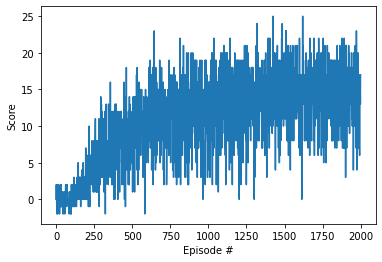

In [3]:
def dqn(n_episodes=2000, max_t=1000):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    Constants
    ======
        AVE_SCORE_TARGET (int): the average of scores in SCORE_WINDOW, above which we consider the problem solved
        SCORE_WINDOW_SIZE (int): number of scores to average over
    """
    SCORE_WINDOW_SIZE = 100
    AVE_SCORE_TARGET = 13
    solved = False                                         # do we have a solution yet?
    best_score = 0                                         # what's our best average score?
    break_on_first_solution = False                        # bail as soon as we meet criteria?
    scores = []                                            # list containing scores from each episode
    variances = []                                         # I want to see the variance of scores in score wind
    scores_window = deque(maxlen=SCORE_WINDOW_SIZE)        # last 100 scores
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            action = agent.get_action(state)               # get action to take
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        avg_score = np.mean(scores_window)
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_score), end="")
        
        if i_episode % SCORE_WINDOW_SIZE == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tScore Variance: {:.2f}'.format(i_episode, avg_score, np.var(scores_window)))
            
        if avg_score >= AVE_SCORE_TARGET and not solved:
            solved = True
            best_score = avg_score
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, avg_score))
            agent.save_policy('checkpoint.pth')
            if break_on_first_solution:
                break
            else:
                print('Continuing to learn')
    
    if avg_score > best_score:
        print('\nFinal Model had Average Score: {:.2f}.  Saving model to: final.pth'.format(avg_score))
        agent.save_policy('final.pth')
    return scores

st = time.time()
scores = dqn()
print("\n\ntotal train time: ", time.time() - st)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [4]:
env.close()